<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

In [140]:
#test/install of js (phillip)
#!pip install js
#from js import fetch

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Ridge

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [143]:
#Phillip note - ignore this  and refer to next cell with pandas csv read of the url

#from js import fetch
#import io

#URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
#data = pd.read_csv(text1)

In [ ]:
#Phillip note - ignore this  and refer to next cell with pandas csv read of the url
#URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
#X = pd.read_csv(text2)

In [3]:
#phillip custom read of the csv #1
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')


In [4]:
data.count()

FlightNumber      90
Date              90
BoosterVersion    90
PayloadMass       90
Orbit             90
LaunchSite        90
Outcome           90
Flights           90
GridFins          90
Reused            90
Legs              90
LandingPad        64
Block             90
ReusedCount       90
Serial            90
Longitude         90
Latitude          90
Class             90
dtype: int64

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
#phillip custom read of the csv #2
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [8]:
X.count()

FlightNumber     90
PayloadMass      90
Flights          90
Block            90
ReusedCount      90
                 ..
GridFins_True    90
Reused_False     90
Reused_True      90
Legs_False       90
Legs_True        90
Length: 83, dtype: int64

In [9]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
Y=data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [10]:
# students get this 
#transform = preprocessing.StandardScaler()

In [11]:
#Refer to machine learning with Python week 4 logistic regression lab
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
#refer to data analysis with python course week 5 lab (also downloaded/saved)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#Print stats of test & training samples
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

#Print stats of test & training samples - another variation of this from the labs
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

number of test samples : 18
number of training samples: 72
Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


we can see we only have 18 test samples.


In [166]:
#confirms 18 test samples similar to above
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
#Phillip comment
#This function implements logistic regression and can use different numerical optimizers to find parameters, 
#including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 

In [22]:
#define parameters
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [49]:
parameters ={'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [68]:
#Phillip test of additional code
#fit model with training set
#see machine learning with python course week 4 logic regression lab
#TBD on parameter usage within logistic regression...seems like applied differently
parameters_NEW ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression(C=.01,solver='lbfgs').fit(X_train,Y_train)

In [86]:
#superceded
#https://stackoverflow.com/questions/58562773/gridsearchcv-with-invalid-parameter-gamma-for-estimator-logisticregression
#parameters_NEW_TEST= {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}

In [136]:
#SUPERCEDED
# define the model/ estimator
#model = Ridge()

In [179]:
#INFORMATIONAL ONLY
#UNDERSTAND THE DICTIONARY KEYS THAT APPLY TO EACH MODEL EG LOGISTIC REGRESSION, SVM, DECISSION TREE, ETC
#https://stackoverflow.com/questions/58562773/gridsearchcv-with-invalid-parameter-gamma-for-estimator-logisticregression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [184]:

#INFORMATIONAL ONLY - LOGISTIC REGRESSION MODELS
#UNDERSTAND THE DICTIONARY KEYS THAT APPLY TO EACH MODEL EG LOGISTIC REGRESSION, SVM, DECISSION TREE, ETC
#https://stackoverflow.com/questions/58562773/gridsearchcv-with-invalid-parameter-gamma-for-estimator-logisticregression
from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression()

print(LogisticRegression().get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [185]:
#INFORMATIONAL ONLY - SUPPORT VECTOR MACHINE MODELS
#UNDERSTAND THE DICTIONARY KEYS THAT APPLY TO EACH MODEL EG LOGISTIC REGRESSION, SVM, DECISSION TREE, ETC
#https://stackoverflow.com/questions/58562773/gridsearchcv-with-invalid-parameter-gamma-for-estimator-logisticregression
from sklearn.linear_model import LogisticRegression


print(SVC().get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [ ]:
#BEGIN NEW CODE BELOW
#Refer to data analysis with python for labs on week 3/4 for logistic regression, svm, and decision trees

In [39]:
#define paramaters
parameters2= {'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

In [40]:
# define the model/ estimator (this is the logistic regression object described in task 4)
model2 = LogisticRegression()

In [41]:
#test
#lr = LogisticRegression()
# We use GridSearchCV to find the value of the range that optimizes a given measurement metric.
logreg_cv2 = GridSearchCV(model2, param_grid = parameters2, cv=10)

In [42]:
#Fit the GridSearchCV object to find the best parameters from the dictionary parameters.
logreg_cv2.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [43]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv2.best_params_)
print("accuracy :",logreg_cv2.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [ ]:
#OTHER SUPPLEMENTAL CODE THAT MAY BE USEFUL FROM LABS - TBD TO TEST WHEN TIME

In [16]:
# best estimator
print(Ridge_reg.best_estimator_)

NameError: name 'Ridge_reg' is not defined

In [205]:
#Phillip test of additional code
#lr.predict(X_test)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [175]:
y_decision_fn_scores_recall = logreg_cv2.decision_function(X_test)

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [44]:
#Step 1 - PREDICTIONS
#Let's make some predictions on the testing dataset and store it into a variable called predTree.
PredTree2 = logreg_cv2.predict(X_test)

In [45]:
#STEP 2 - EVALUATION OF PREDICTIONS
#Now let's check the accuracy of the model
#"Accuracy classification score" computes subset accuracy: the set of labels predicted for a sample must exactly 
#match the corresponding set of labels in y_true.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, PredTree2))

DecisionTrees's Accuracy:  0.8333333333333334


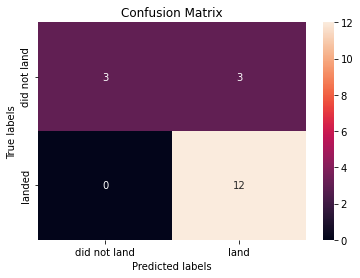

In [47]:
yhat=logreg_cv2.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [36]:
#Phillip test of additional code
#see grid search video from data analysis with python week 5
#Define Ridge and logreg_cv GridSearchCV object


# define the grid search

logreg_cv2=GridSearchCV(model2,parameters2,cv=10,)

In [ ]:
#Do they mean the cross val score?  It's not clear which "score" they are referring to
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [37]:
#see grid search video from data analysis with python week 5 (4 min 18s seconds)
scores=logreg_cv_NEW.cv_results_

In [38]:
logreg_cv_NEW.score(X_test, Y_test)

0.8333333333333334

In [39]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, yhat,pos_label=0)

NameError: name 'yhat' is not defined

In [ ]:
#Other options could be F1_score (explained in the SVM lab)

Lets look at the confusion matrix:


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


In [ ]:
#redo of logistic regression

## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [48]:
parameters3 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [49]:
#define the model
model3 = SVC()

In [50]:
#test
#lr = LogisticRegression()
# We use GridSearchCV to find the value of the range that optimizes a given measurement metric.
svm_cv = GridSearchCV(model3, param_grid = parameters3, cv=10)

In [51]:
#Fit the GridSearchCV object to find the best parameters from the dictionary parameters.
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [52]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [53]:
#Step 1 - PREDICTIONS
#Let's make some predictions on the testing dataset and store it into a variable called predTree.
PredTree3 = svm_cv.predict(X_test)

In [54]:
#STEP 2 - EVALUATION OF PREDICTIONS
#Now let's check the accuracy of the model
#"Accuracy classification score" computes subset accuracy: the set of labels predicted for a sample must exactly 
#match the corresponding set of labels in y_true.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, PredTree3))

DecisionTrees's Accuracy:  0.8333333333333334


We can plot the confusion matrix


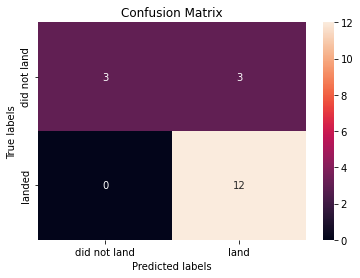

In [55]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters4 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
    
     'random_state': [0]    #added per advice from forums     
              }

In [24]:
#Define the model
model4 = DecisionTreeClassifier()

In [25]:
#test
#lr = LogisticRegression()
# We use GridSearchCV to find the value of the range that optimizes a given measurement metric.
tree_cv = GridSearchCV(model4, param_grid = parameters4, cv=10)

In [ ]:
#Fit the GridSearchCV object to find the best parameters from the dictionary parameters.
tree_cv.fit(X_train, Y_train)

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 0, 'splitter': 'random'}
accuracy : 0.8625


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
#Refer to course machine learning with python week 3 decision tree lab "Prediction" section

In [30]:
#Step 1 - PREDICTIONS
#Let's make some predictions on the testing dataset and store it into a variable called predTree.
PredTree4 = tree_cv.predict(X_test)

In [31]:
#You can print out predTree and y_testset if you want to visually compare the predictions to the actual values.
print (PredTree4 [0:5])
print (Y_test [0:5])

[1 1 1 1 1]
[1 1 1 1 1]


In [35]:
#STEP 2 - EVALUATION OF PREDICTIONS
#Now let's check the accuracy of the model
#"Accuracy classification score" computes subset accuracy: the set of labels predicted for a sample must exactly 
#match the corresponding set of labels in y_true.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, PredTree4))

DecisionTrees's Accuracy:  0.8333333333333334


We can plot the confusion matrix


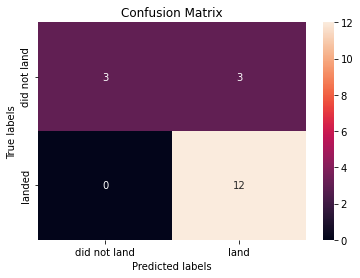

In [22]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [25]:
parameters5 = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [26]:
#Define the model
model5 = KNeighborsClassifier()

In [27]:
#test
#lr = LogisticRegression()
# We use GridSearchCV to find the value of the range that optimizes a given measurement metric.
knn_cv = GridSearchCV(model5, param_grid = parameters5, cv=10)

In [ ]:
#Fit the GridSearchCV object to find the best parameters from the dictionary parameters.
knn_cv.fit(X_train, Y_train)

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [95]:
#Fit the GridSearchCV object to find the best parameters from the dictionary parameters.
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [124]:
#Step 1 - PREDICTIONS
#Let's make some predictions on the testing dataset and store it into a variable called predTree.
PredTree5 = knn_cv.predict(X_test)

In [126]:
#STEP 2 - EVALUATION OF PREDICTIONS
#Now let's check the accuracy of the model
#"Accuracy classification score" computes subset accuracy: the set of labels predicted for a sample must exactly 
#match the corresponding set of labels in y_true.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, PredTree5))

DecisionTrees's Accuracy:  0.8333333333333334


We can plot the confusion matrix


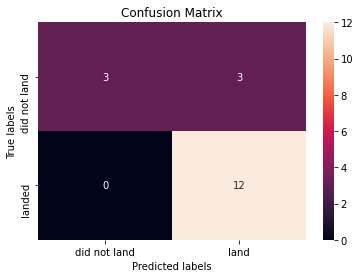

In [127]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [ ]:
#All of the modelels yield about the same accuracy of 83.333%
#confirmed in discussion forums also
https://www.coursera.org/learn/applied-data-science-capstone/discussions/weeks/4/threads/TIat0iEUEeywtQrBGtHwFQ

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
